# Exploratory Data Analysis

In [1]:
import pandas as pd
import sys
import os

# Agrega el path al directorio raíz del proyecto
sys.path.append(os.path.abspath(".."))

# Importar la clase par ver duplicados
from scripts.duplicados import Duplicados
from scripts.blackAndWhite import BlackAndWhite

In [2]:
# Extraer datos de un archivo CSV
df = pd.read_csv('../data/raw/eventos.csv')

## Resumen de datos

In [3]:
df.head()

,Video,Evento,PCB,Start_Frame,End_Frame
0,Abuse001_x264.mp4,Abuse,237.0,327.0,397.0
1,Abuse002_x264.mp4,Abuse,NaN,174.0,266.0
2,Abuse003_x264.mp4,Abuse,351.0,951.0,3614.0
3,Abuse004_x264.mp4,Abuse,558.0,898.0,5779.0
4,Abuse005_x264.mp4,Abuse,210.0,717.0,933.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Video        700 non-null    object 
 1   Evento       700 non-null    object 
 2   PCB          194 non-null    float64
 3   Start_Frame  340 non-null    float64
 4   End_Frame    340 non-null    float64
dtypes: float64(3), object(2)
memory usage: 27.5+ KB


### Nulos

In [5]:
df.isna().sum()

Video            0
Evento           0
PCB            506
Start_Frame    360
End_Frame      360
dtype: int64

In [6]:
# Si Start_Frame no es nulo, cuantos PCB son nulos
df[df['Start_Frame'].notnull()]['PCB'].isna().sum()

146

In [7]:
506-146

360

In [8]:
# Elimina todos los registros donde Start_Frame es nulo
df = df[df['Start_Frame'].notnull()]

In [9]:
df.isna().sum()

Video            0
Evento           0
PCB            146
Start_Frame      0
End_Frame        0
dtype: int64

In [10]:
# Rellena los nulos con 0
df = df.fillna(0)

In [11]:
df.isna().sum()

Video          0
Evento         0
PCB            0
Start_Frame    0
End_Frame      0
dtype: int64

In [12]:
df.shape

(340, 5)

### Duplicados

In [13]:
# Ver los duplicados
df.duplicated().sum()

0

In [14]:
# Ver los duplicados 
duplicados = Duplicados("../data/Anomaly-Detection-Dataset/Anomaly-Videos",df)

In [15]:
df_duplicados = duplicados.encontrar_duplicados()

[DUPLICADO] Robbery138_x264.mp4 es similar a Assault050_x264.mp4


## Análisis Univariado

<Axes: >

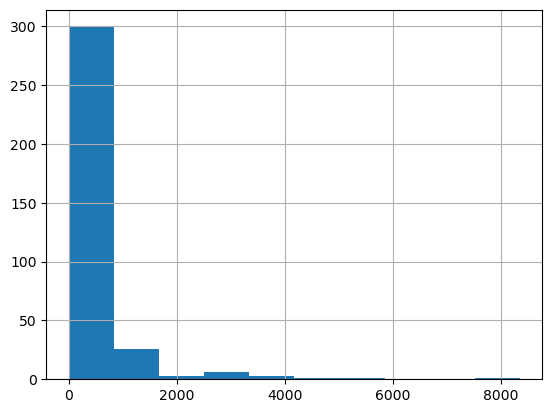

In [16]:
# Histograma de PCB
df['PCB'].hist()

<Axes: >

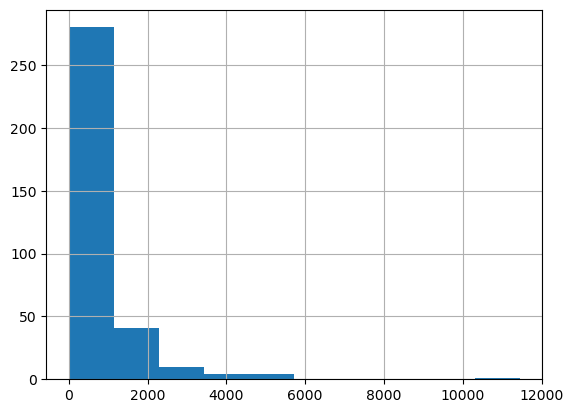

In [17]:
# Histograma de Start_Frame
df['Start_Frame'].hist()

<Axes: >

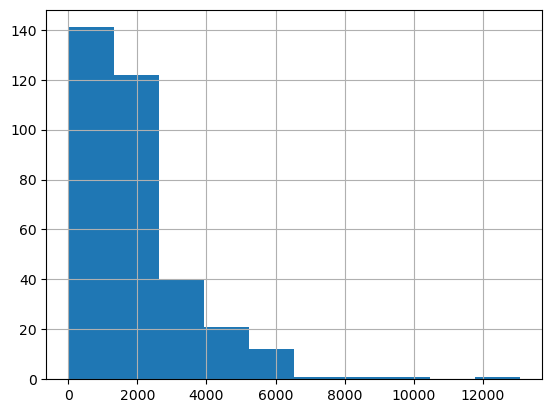

In [18]:
# Histograma de End_Frame
df['End_Frame'].hist()

In [19]:
# Crea columna diferencia y resta Start_Frame - PCB
df['diferencia'] = df['Start_Frame'] - df['PCB']

<Axes: >

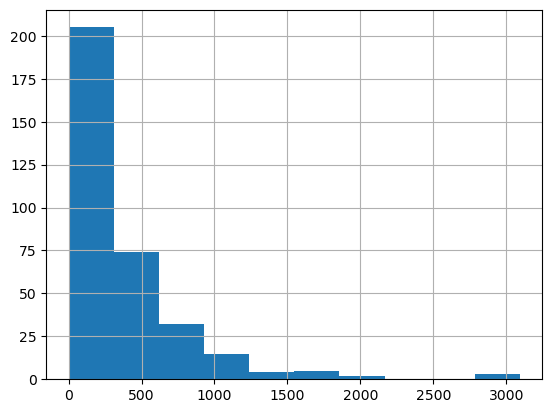

In [20]:
# Histograma de la columna diferencia
df['diferencia'].hist()

<Axes: xlabel='Evento'>

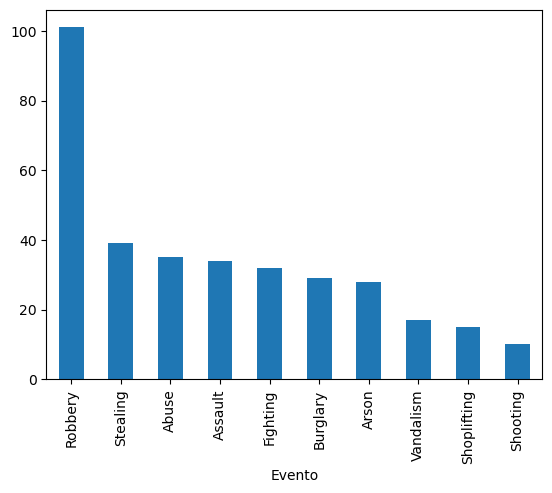

In [21]:
# Histograma de la columna Evento
df['Evento'].value_counts().plot(kind='bar')

In [22]:
df.shape

(340, 6)

In [23]:
duplicados = Duplicados("../data/Anomaly-Detection-Dataset/Anomaly-Videos",df)

In [24]:
duplicados.encontrar_duplicados()

[DUPLICADO] Robbery138_x264.mp4 es similar a Assault050_x264.mp4


,Video,Evento,PCB,Start_Frame,End_Frame,diferencia
437,Robbery138_x264.mp4,Robbery,0.0,86.0,623.0,86.0


In [25]:
bw_videos = BlackAndWhite("../data/Anomaly-Detection-Dataset/Anomaly-Videos", df)

In [26]:
df_bw = bw_videos.encontrar_bw()

[Blanco y Negro] Video: Arson006_x264.mp4
[Blanco y Negro] Video: Arson036_x264.mp4
[Blanco y Negro] Video: Assault014_x264.mp4
[Blanco y Negro] Video: Assault017_x264.mp4
[Blanco y Negro] Video: Burglary022_x264.mp4
[Blanco y Negro] Video: Stealing020_x264.mp4
[Blanco y Negro] Video: Stealing061_x264.mp4
[Blanco y Negro] Video: Stealing075_x264.mp4
[Blanco y Negro] Video: Stealing102_x264.mp4


In [27]:
df_bw

,Video,Evento,PCB,Start_Frame,End_Frame,diferencia
54,Arson006_x264.mp4,Arson,675.0,788.0,2256.0,113.0
83,Arson036_x264.mp4,Arson,0.0,85.0,1588.0,85.0
113,Assault014_x264.mp4,Assault,110.0,313.0,1253.0,203.0
116,Assault017_x264.mp4,Assault,0.0,2.0,20.0,2.0
171,Burglary022_x264.mp4,Burglary,269.0,452.0,2333.0,183.0
567,Stealing020_x264.mp4,Stealing,1507.0,1665.0,5839.0,158.0
601,Stealing061_x264.mp4,Stealing,0.0,519.0,2217.0,519.0
614,Stealing075_x264.mp4,Stealing,0.0,90.0,5162.0,90.0
637,Stealing102_x264.mp4,Stealing,75.0,409.0,1029.0,334.0


In [38]:
# Ver cuantas filas tiene el dataframe
bw = df_bw.shape
normal = df.shape

<Axes: ylabel='cantidad'>

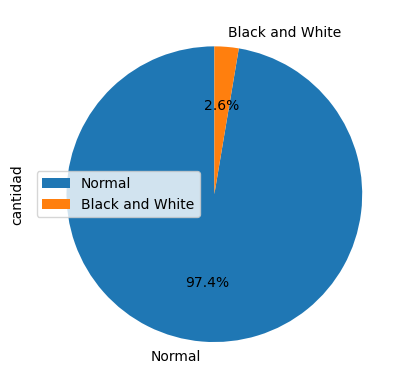

In [42]:
# Gráfico pie de bw[0] y normal[0] - bw[0]
df_pie = pd.DataFrame({'tipo': ['Normal','Black and White'], 'cantidad': [normal[0]-bw[0], bw[0]]})
df_pie.plot.pie(y='cantidad', labels=df_pie['tipo'], autopct='%1.1f%%', startangle=90)